In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:85% !important; }</style>"))

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! ls /home/gaurang/Raindrop/P12data/process_scripts/

Generate_splitID.py   ParseData.py  remove_outliers.py	Splits_phy12.ipynb
IrregularSampling.py  readme	    sanity_check.py


In [4]:
# Load data
# with open("/home/gaurang/Raindrop/P12data/process_code/phy12_data.json", 'r') as f:
P_list = np.load("/home/gaurang/Raindrop/P12data/processed_data/P_list.npy", allow_pickle=True)

print(len(P_list))
# check id alignment

12000
147774
(57.0, 63.0, 3.0, 1.0, 175.3)


In [6]:
p = P_list[600]
print(p['id'])
print(p['static'])

134091
(55.0, 0.0, -1.0, 4.0, 41.5)


['ALP' 'ALT' 'AST' 'Albumin' 'BUN' 'Bilirubin' 'Cholesterol' 'Creatinine'
 'DiasABP' 'FiO2' 'GCS' 'Glucose' 'HCO3' 'HCT' 'HR' 'K' 'Lactate' 'MAP'
 'MechVent' 'Mg' 'NIDiasABP' 'NIMAP' 'NISysABP' 'Na' 'PaCO2' 'PaO2'
 'Platelets' 'RespRate' 'SaO2' 'SysABP' 'Temp' 'TroponinI' 'TroponinT'
 'Urine' 'WBC' 'pH']


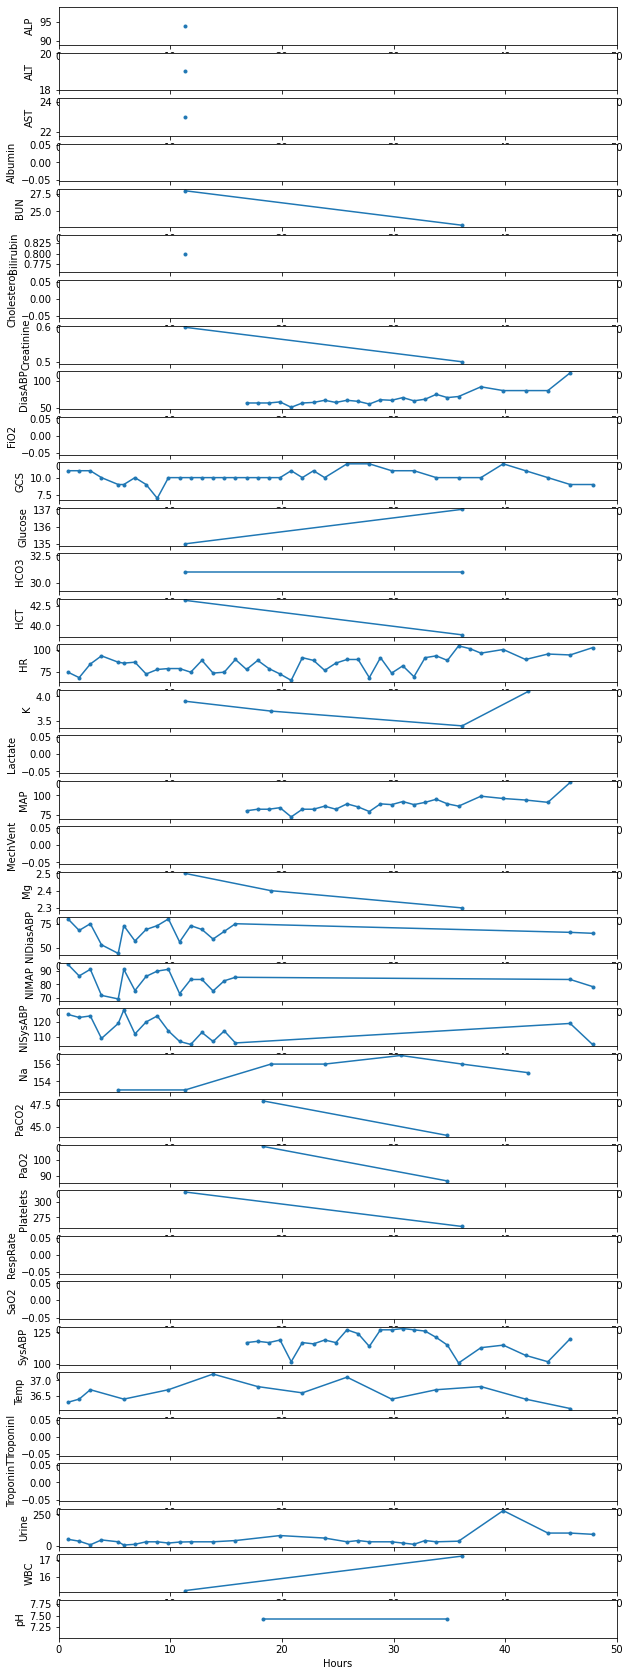

In [7]:
params_list = np.load('/home/gaurang/Raindrop/P12data/processed_data/ts_params.npy')

print(params_list)

# plot patient trajectory
npts = len(p['ts'])
plt.figure(figsize=(10,30))
cnt = 1
# params_print = ['HR','MAP','SysABP','Temp']
for target_param in params_list:
    t_hrs = []
    values = []
    for i in range(npts):
        param = p['ts'][i][3]
        if param==target_param:
            t_hrs.append(p['ts'][i][2]/60.0)
            values.append(p['ts'][i][4])

    plt.subplot(len(params_list),1,cnt)
    plt.plot(t_hrs, values, '.', linestyle='-')
    plt.xlabel('Hours'), plt.ylabel(target_param)
    plt.xlim([0,50])
    cnt += 1
plt.show()